# ML Auto T31.ipynb

## Gyors link
[log](#log) [car](#car) [run](#run) [zip](#zip)

**ToDo:**

Átírtam egy Notebookot úgy, hogy egy tesztet sziszematikusan végig futtasson és az eredményeket letegye valahova.



# Korábbi PNG fájlok törlése

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

import os
import sys
import pickle
import importlib

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')


In [3]:
%%capture
!rm MLPPlot.py
!rm environments.py
!rm plotters.py
!rm debils.py
!rm cars.py
!rm dev.py
!rm *.py.*
!rm *.pkl

!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/Micado-Research/main/MLPPlot.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP/main/debils.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP/main/environments.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP/main/plotters.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP/main/storages.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP/main/cars.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP/main/dev.py

# !curl -H 'Pragma: no-cache' https://raw.githubusercontent.com/JoDeMiro/TMP/main/cars.py --output cars.py


In [4]:
import subprocess

result = subprocess.run(["wget", "--no-cache",
                         "--backups=1",
                         "https://raw.githubusercontent.com/JoDeMiro/TMP/main/cars.py"],
                        stderr=subprocess.PIPE, stdout=subprocess.PIPE)
# print(result.stderr.decode("utf-8"))

In [5]:
import MLPPlot
from MLPPlot import DrawNN

from debils import Printer
from environments import Road
from plotters import PostPlotter, Plotter
from storages import Storage
from cars import TestCar, Car
import dev


<a name="set"></a> set [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [tst](#tst)


In [127]:
# A Road osztály az environment.py modulban van

# Sok féle utat lehet létrehozni a tesztekhez, a Road objektumnak van egy show metodusa amivel ki lehet plottolni az utat.

# -

# test_road = Road(wide = 124, length = 1000)
# test_road.show(height=5)

# -

# test_road = Road(wide = 124, length = 1000)
# test_road.wizu()

# -

# Mindeféle dolgkokat kipróbálunk az 'úttal' kapcsolatban, akár úgy, hogy az egyik, vagy mindkét szenzor determinisztikus
# kapcsolatban van a cél változóval, vagy úgy, hogy ne legyen determinisztikus a kapcsolat, alább látható néhány próba

## Experiment

<a name="exp"></a> [set](#set) exp [run](#run) [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [tst](#tst)


cut_point  480
# ----------------------------------------- road Description -----------------------------------------
  		 road.length =  2400
  		 minimum slope (descending) =  -0.5913699733885949
  		 maximum slope (ascending)  =   22.525548489697485
# ----------------------------------------------------------------------------------------------------


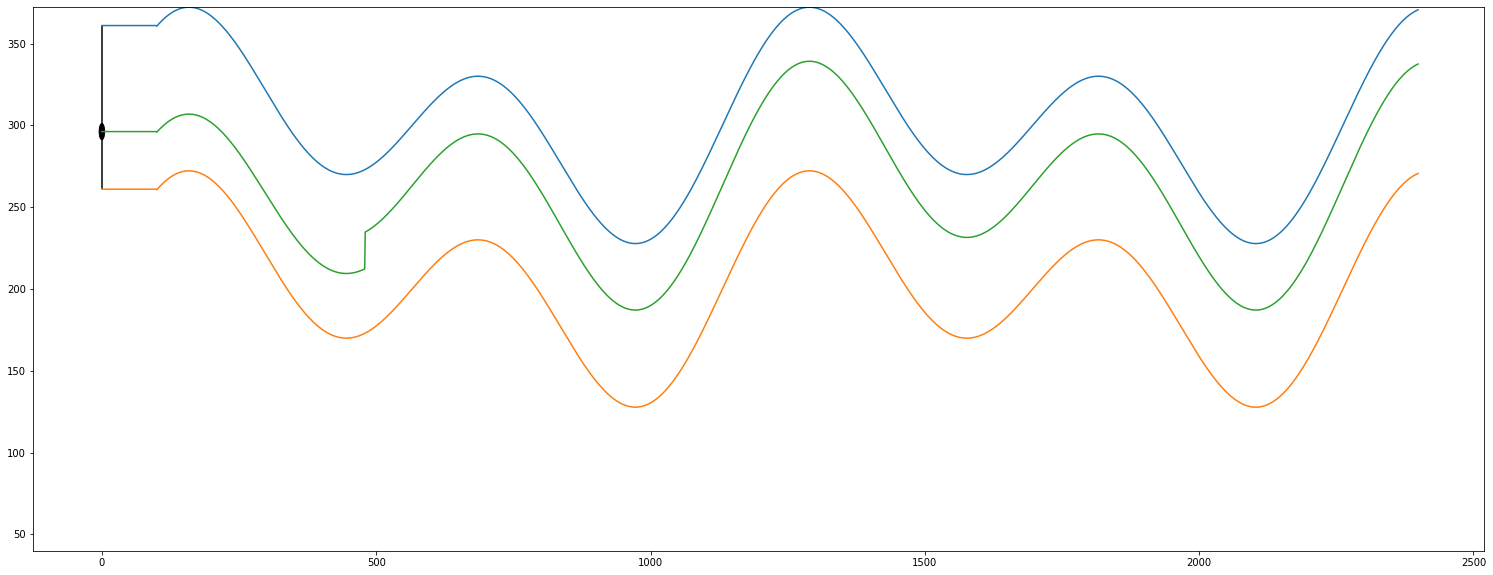

 --------------- plot --------------- 


In [128]:
# road = Road(wide = 100, length = 1200, type = 99, v = 50, shift = 3)       # shift  left
# road = Road(wide = 100, length = 1200, type = 98, v = 50, strech = 3)      # strech(main wave)  left
# road = Road(wide = 100, length = 1200, type = 97, v = 50, strech = 300)    # strech(main wave)  left
# road = Road(wide = 100, length = 1200, type = 96, v = 50, strech = 2)      # strech(all wave)  left

# road = Road(wide = 200, length = 1200, type = 95, v = 50, shift = 100, strech = 0)      # center = (l + r) / 2
# road = Road(wide = 200, length = 2400, type = 95, v = 50, shift = 100, strech = 0)      # center = (l + r) / 2
# road = Road(wide = 200, length = 2400, type = 95, v = 50, shift = 100, strech = 10)     # center = (l + r) / 2
# road = Road(wide = 200, length = 2400, type = 95, v = 50, shift = 100, strech = 20)     # center = (l + r) / 2

# Ez már nem determinisztikus (b = 100) --> folyamatosan emeli a középvonalat

# Kiiktattam a középső szenzort -> ezekhet a kísérletekhez
# road = Road(wide = 200, length = 2400, type = 89, v = 50, shift = 100, strech = 20, noise=0, b=100)    # linear elevation

# Concept drift :)
road = Road(wide = 100, length = 2400, type = 79, v = 50, shift = 0, strech = 0, noise=0, b=0)


# mindez a sok jó eredmény azért lehetséges, mert az út maga még mindíg determinisztikus kapcsolatban áll az egyik fallal (!)
plotter = Plotter()
storage = Storage()
printer = Printer()
auto = Car(road, plotter, storage, printer)

auto.sensor_center_enable = False                 # <------------ kikapcsoltam a középső szenzort

auto.calculate_distances()
auto.plot_history(1)

# Run

<a name="run"></a> [set](#set) [exp](#exp) run [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [tst](#tst)


In [129]:
auto.run(1900, silent = True)

# A run ciklus eleje -------------------------------------------------------------------------------------------------------------------- 
# i =  1891
actual predicted_test =  [0.18134101]
actual self.y_distance[-1] =  0.20028167910317052
actual predicted_test_inv =  [0.259579]
len(self.y_distance_predicted) =  624
len(self.y_distance_predicted_inv) =  624
# A run ciklus eleje -------------------------------------------------------------------------------------------------------------------- 
# i =  1892
# A run ciklus eleje -------------------------------------------------------------------------------------------------------------------- 
# i =  1893
# i =  1893
Iteration 628, loss = 0.05020922
Validation score: 0.385354
első if
---------------> self.y 279.20679813169795, self.road.wall_left[self.x] = 314.2718656453386, self.road.wall_right = 214.27186564533858
self.y új értéke   =  279.20679813169795
action             =  1
----------------- módosítás vége -----------------
# A run 

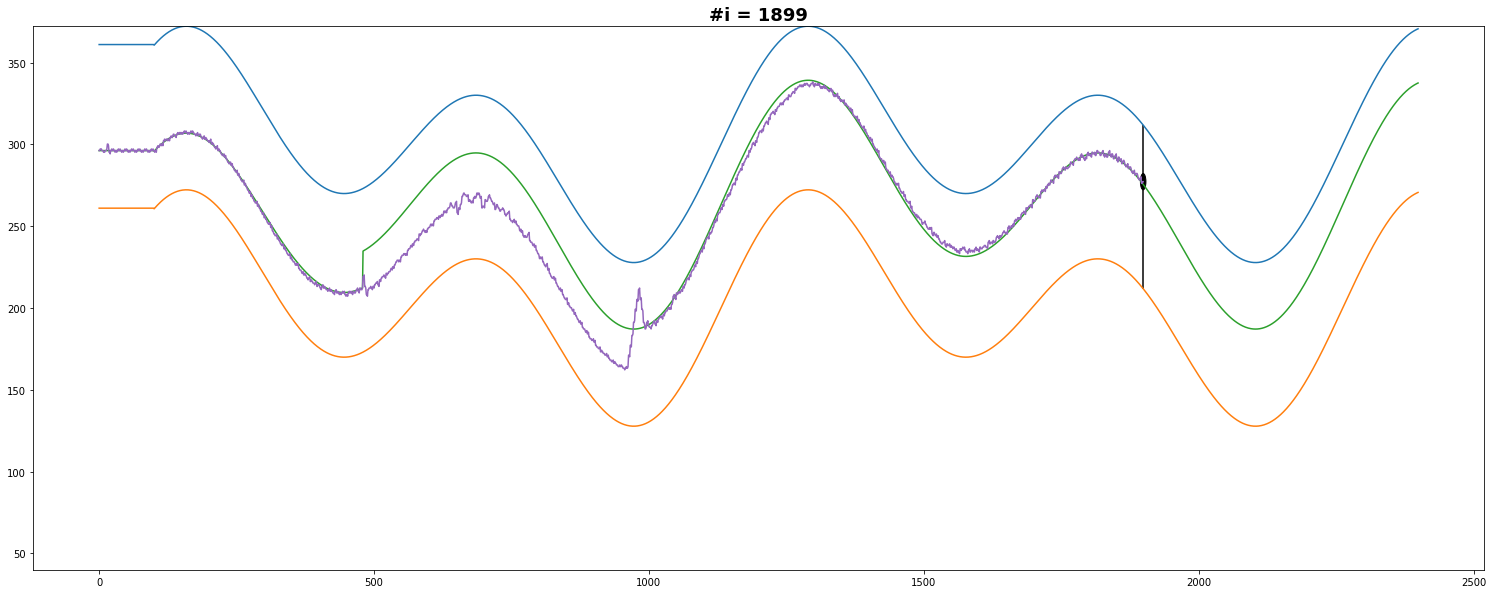

 --------------- plot --------------- 


In [130]:
auto.plot_history(1)

# Dev

<a name="dev"></a> [set](#set) [exp](#exp) [run](#run) dev [pst](#pst) [str](#str) [zip](#zip) [tst](#tst)


In [131]:
print('len = ', len(auto.mlp.coefs_))

print('type(auto.mlp.coef_[0]) = ', type(auto.mlp.coefs_[0]))
print('type(auto.mlp.coef_[1]) = ', type(auto.mlp.coefs_[1]))

print('auto.mlp.coef[].shape = ',auto.mlp.coefs_[0].shape)
print('auto.mlp.coef[].shape = ',auto.mlp.coefs_[1].shape)
print('auto.mlp.coef[].shape = ',auto.mlp.coefs_[2].shape)

len =  3
type(auto.mlp.coef_[0]) =  <class 'numpy.ndarray'>
type(auto.mlp.coef_[1]) =  <class 'numpy.ndarray'>
auto.mlp.coef[].shape =  (3, 10)
auto.mlp.coef[].shape =  (10, 5)
auto.mlp.coef[].shape =  (5, 1)


1885


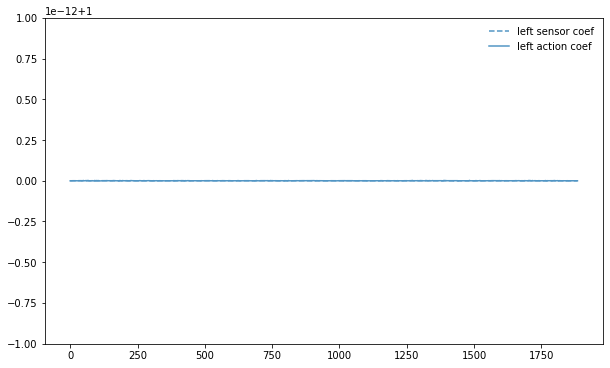

1885


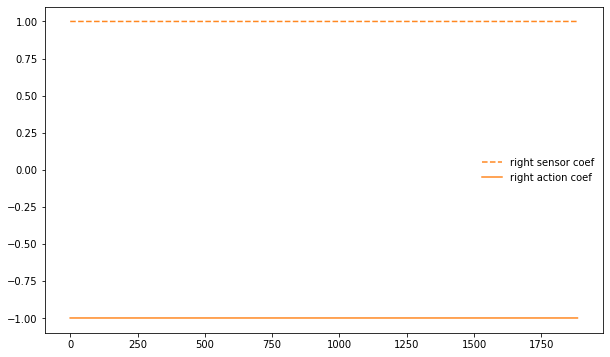

1885


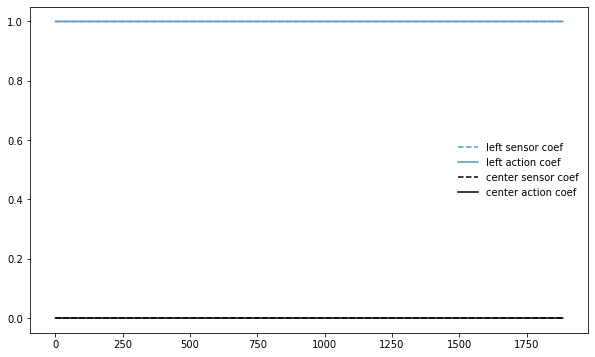

1885


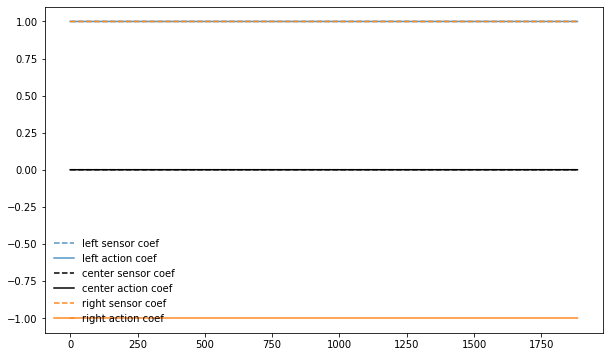

1885


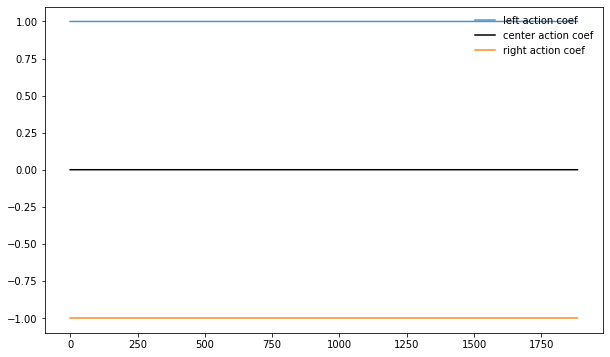

1885


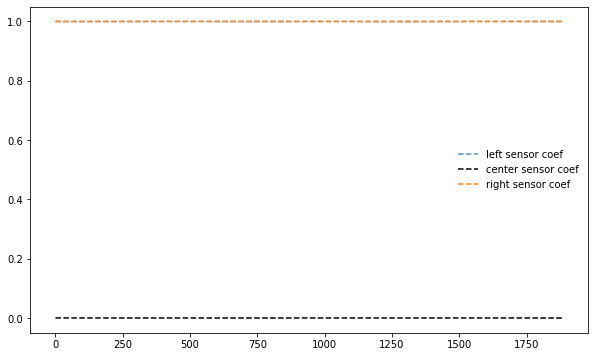

In [132]:

# ugyen ezt meg kell csinálni az mlp modellre is (ott kicsit több súly van)

# aztán áttenni mindkettőt a plotter osztályba


postPlotter = PostPlotter(auto)

postPlotter.plot_lr_weight(car = auto, flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['right'], flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['left', 'center'], flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['left', 'center', 'right'], flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['left', 'center', 'right'], coefs=['sensor'], flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['left', 'center', 'right'], coefs=['action'], flag = 1)


In [133]:
# Create rotated animation from still image - sensor_left, sensor_right vs y_distance

# Temporary disabled - flag = 0

from dev import *

for i in range(100):
    Plot3DVersion5(elevation = 10, azimuth = i, flag = 0, i=i)

[ 3 10  5  1]


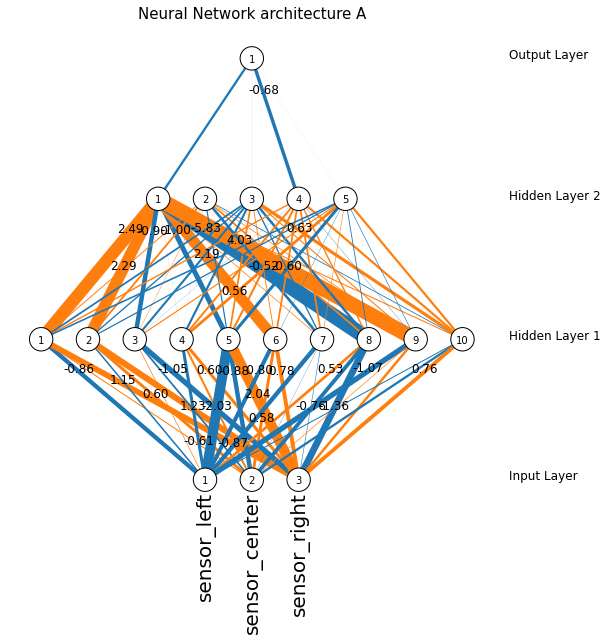

In [134]:
auto.plotter.plot_mlp(mlp=auto.mlp, flag = 3)

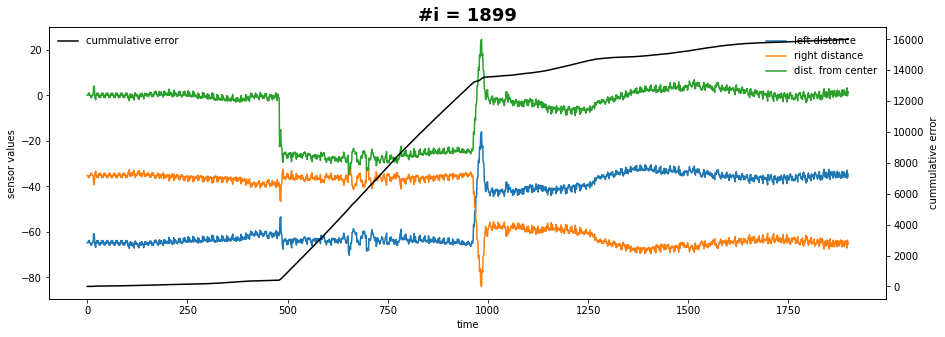

In [135]:
auto.plotter.test_plot2(auto.sensor_left, auto.sensor_right, auto.y_distance, auto.x, flag=1, lists=[6])

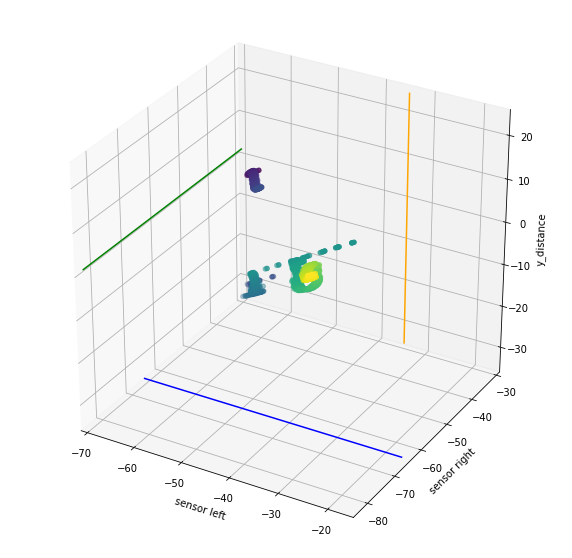

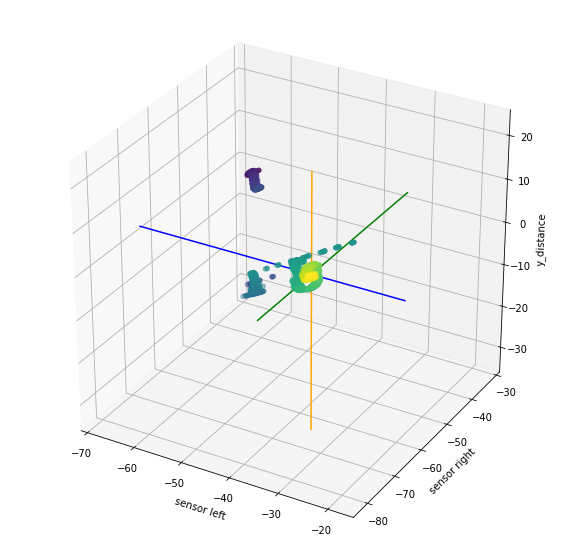

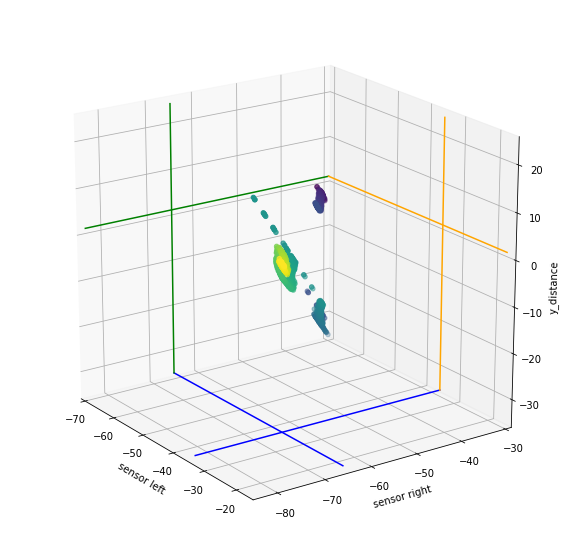

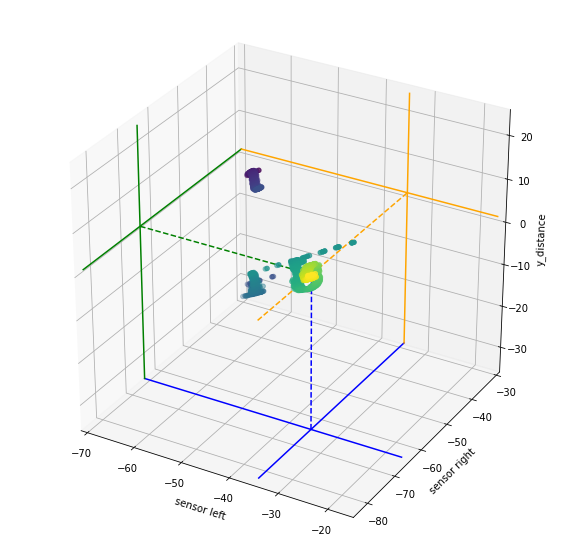

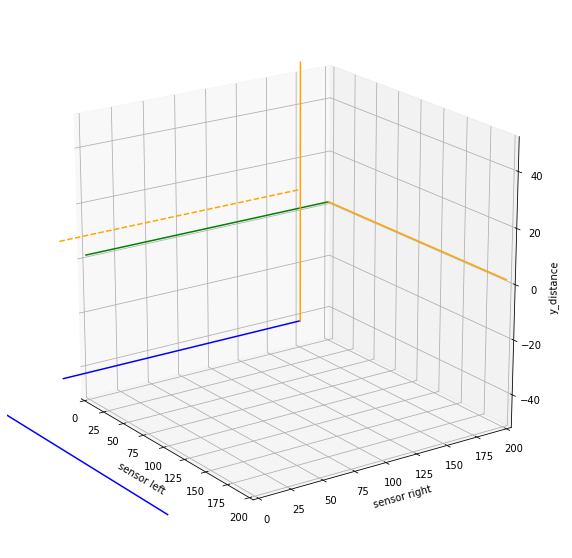

In [136]:
auto.plotter.test_plot(auto.sensor_left, auto.sensor_right, auto.y_distance, auto.x, flag=1, lists=[99])

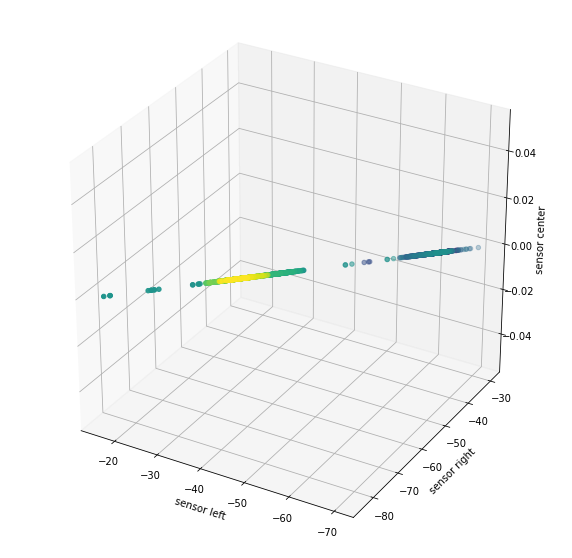

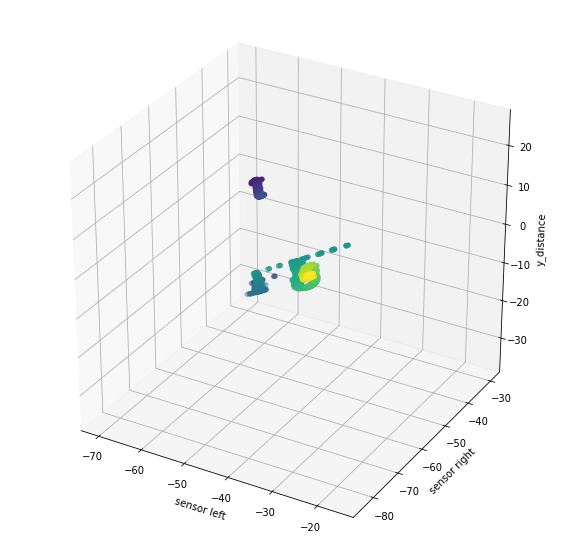

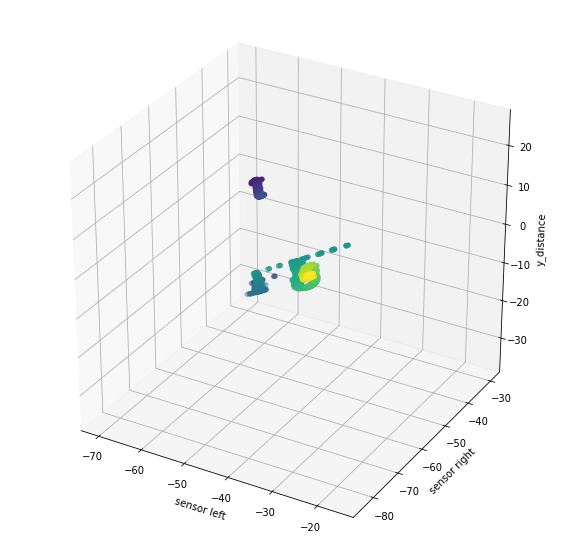

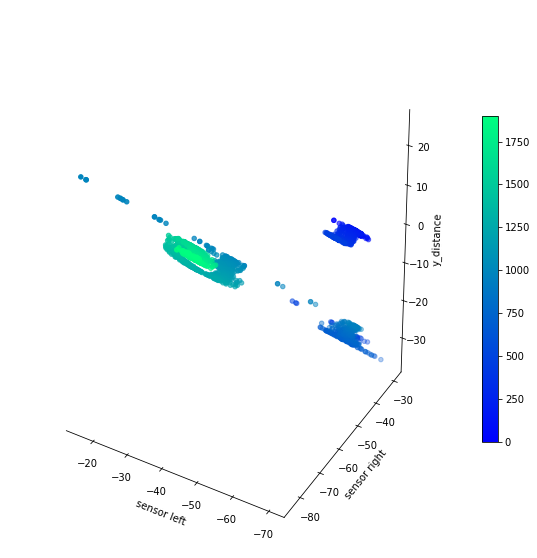

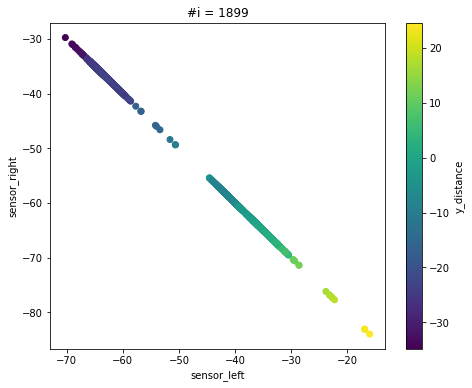

In [137]:
auto.plot_state_space_discover(1)

# PostPlotter

<a name="pst"></a> [set](#set) [exp](#exp) [run](#run) [dev](#dev) pst [str](#str) [zip](#zip) [tst](#tst)


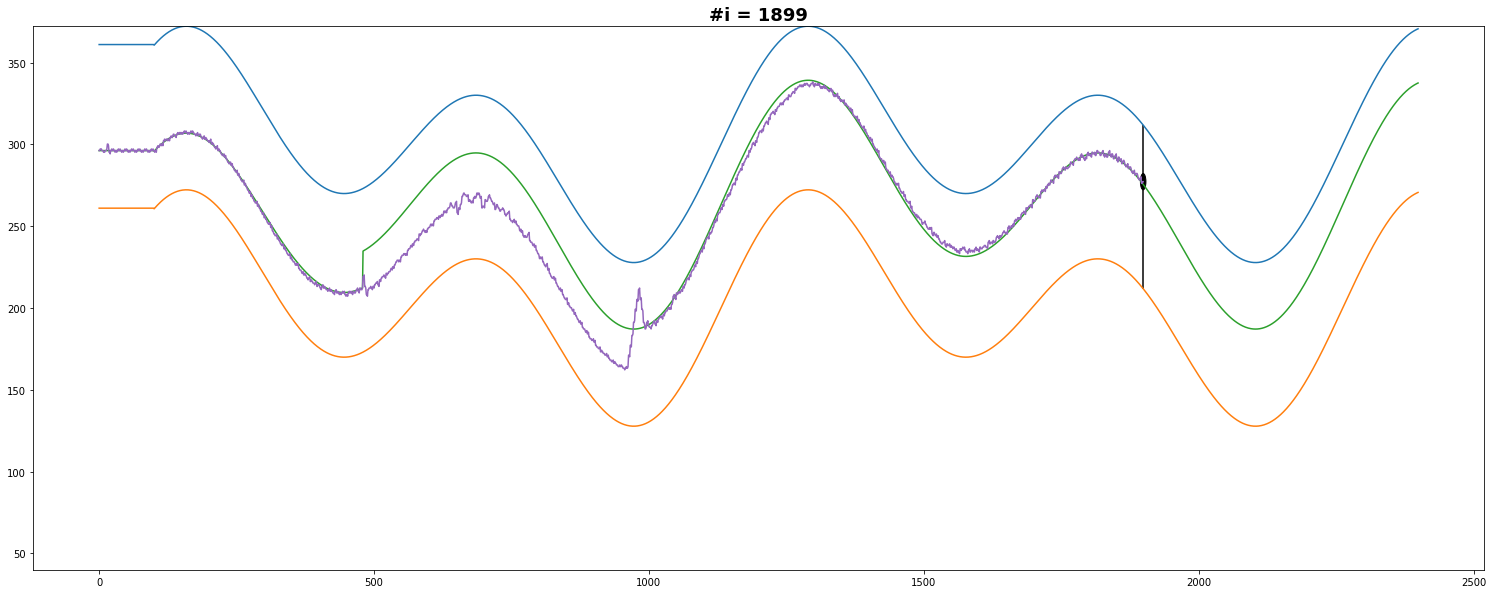

 --------------- plot --------------- 


In [138]:
# Nem post plotter, hanem az auto.plot_history(flag = 1)
auto.plot_history(1)

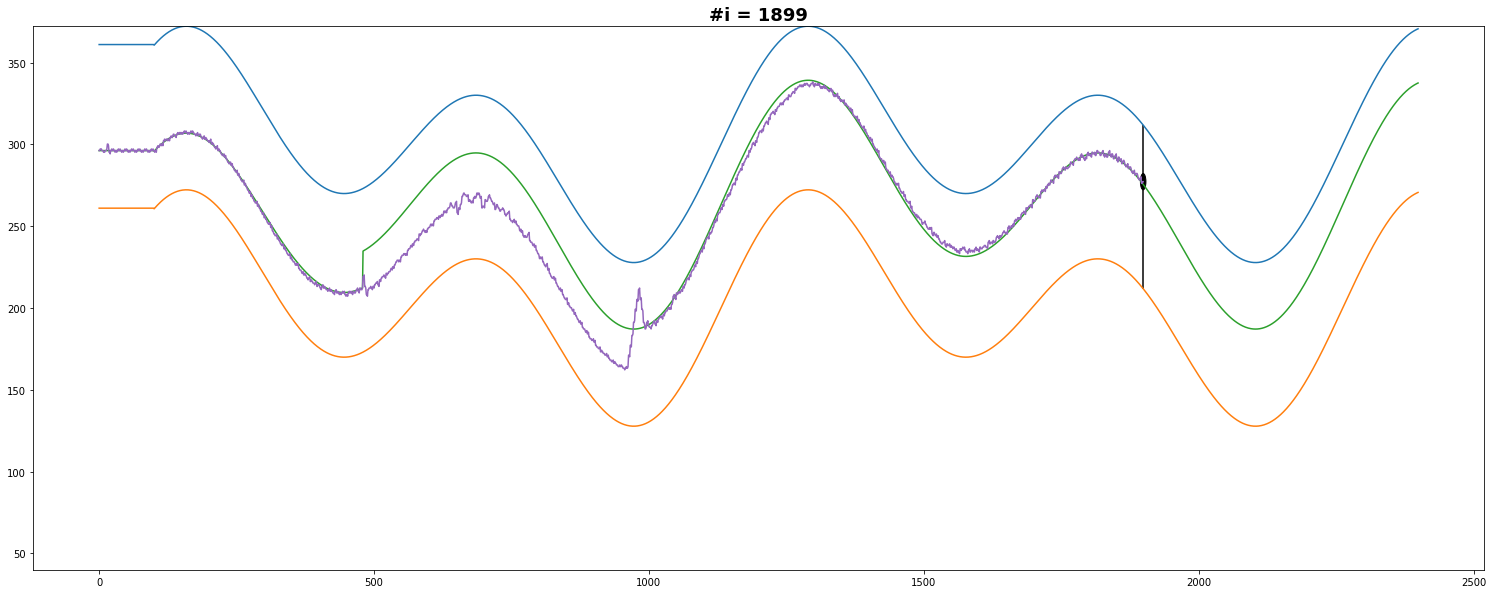

 --------------- plot --------------- 


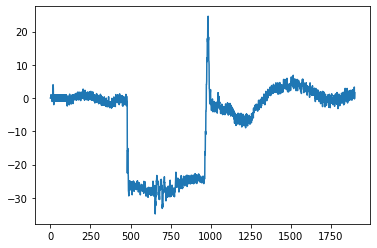

[ 3 10  5  1]


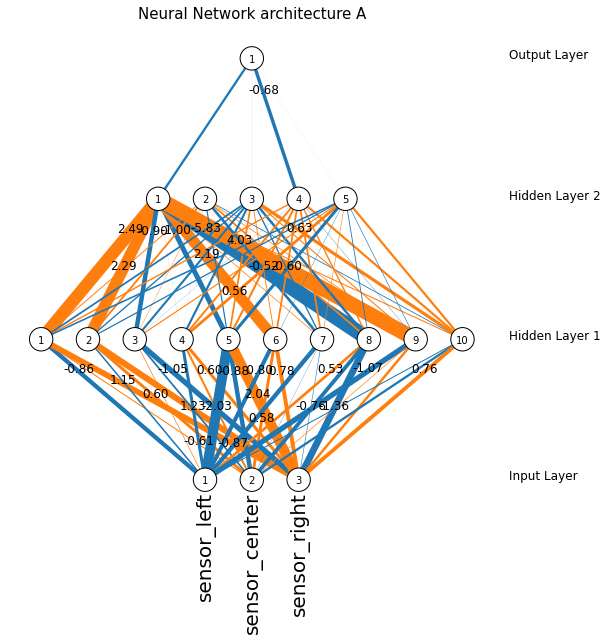

In [139]:
postPlotter = PostPlotter(auto)

postPlotter.plot_history(flag = 1)

postPlotter.plot_y_distance()

postPlotter.plot_mlp()


In [140]:
# csinálni egy animációt simán arra, hogy fix center érték mellett megtekeri a plotot

# csinálni arra is egy animációt, hogy fix nézőpont mellett végig iterál center 50-től 200-ig

# Create rotated animation from still image - sensor_left, sensor_right vs y_distance, predcition

# Temporary disabled - flag = 0

for i in range(100):
    postPlotter.plot_mlp_surface_prediction_v4(limit = True, flag = 0, resolution=100, transparency=0.8, cmap='Blues',
                                               center=100, elevation=10, azimuth = i, i = i)

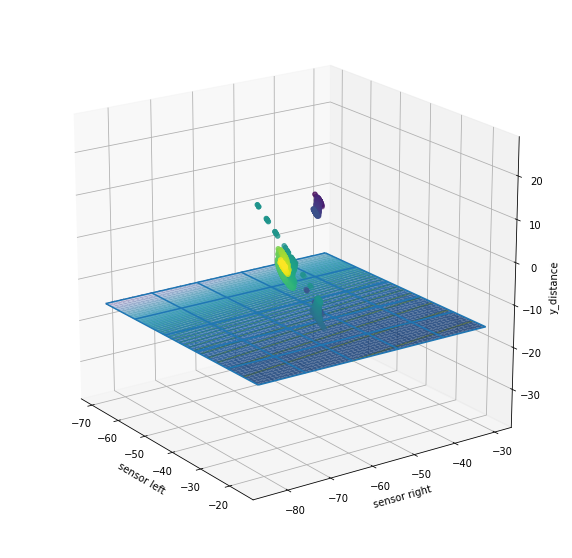

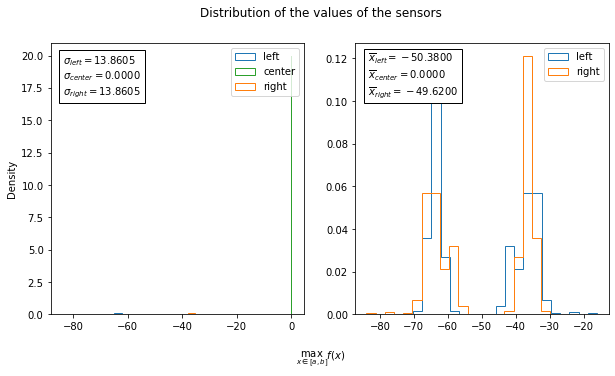

In [141]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

postPlotter = PostPlotter(auto)

postPlotter.plot_mlp_surface_prediction_v4(resolution=100, transparency=0.8, cmap='Blues', center=100)

postPlotter.plot_sensors_distibution(bins=20)

## TestCar

<a name="str"></a> [set](#set) [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) str [zip](#zip) [tst](#tst)


In [142]:
# Save

# Via storage object -> passing a car object
storage.save_mlp_from_object(auto)
storage.save_regression_from_object(auto)
storage.save_minmaxscaler_from_object(auto)

# Via auto.storage object -> passing a car object and its property fields
#  -> this can be used inside the car.run() methos as well
auto.storage.save_mlp(auto.mlp)
auto.storage.save_minmaxscaler(auto.x_minmaxscaler, auto.y_minmaxscaler)
auto.storage.save_regression(auto.regression_left, auto.regression_center, auto.regression_right)

# Both, the storage and the auto.storage has the same refrence, so it works back and forth

# ----------------------------------------------------------------------------------------

# Load

# Via storage object -> these are void methods but updates its own self.property fields which later can be called such 'storage.mlp', 'storage.regression_left'
storage.load_mlp()
storage.load_regression()
storage.load_minmaxscaler()


# Via car object -> these are the same as above (as storage is a property of the car object) -> works as a static void or a vodi setter
auto.storage.load_mlp()
auto.storage.load_regression()
auto.storage.load_minmaxscaler()
# Both, the storage and the auto.storage has the same refrence, so it works back and forth


# Ez viszont csak az auto objektumon kereszül érhető el és nem perzistens, gyakorlatilag ezt mentjük el és ezt váltjuk ki a betöltéssel, ha van mit betölteni
auto.mlp

# Ha el lett menteve akármelyik módszerrel
storage.save_mlp_from_object(auto)
auto.storage.save_mlp(auto.mlp)
# Akkor utána elérhető akár az auto.storage objektumon keresztül
auto.storage.mlp
# Akár a storage objektumon keresztül, mert minkettőnek ugyan az a referenciája
storage.mlp

# lényegében ha a storage load megtörtént akkor ezt kell használnom a tesztautóban
# a tesztautó példányosításnál kapja meg a storage-ot és az __init__-ben híja
# meg a load_all metodust

# tanuló car (auto) pedig a futás végén hívja meg a storage save_all metodust
# ezzel gyakorlatilag kiírja minden modelt amit majd a teszt autó be tud olvasni

MLPRegressor(activation='tanh', early_stopping=True, hidden_layer_sizes=(10, 5),
             learning_rate_init=0.01, max_iter=1, n_iter_no_change=2000,
             random_state=1, shuffle=False, verbose=True, warm_start=True)

In [143]:
# Igazából azt hiszem az utat sem kell újra megcsinálnunk, de ha később új utat szeretnénk neki adni azt itt tehetjük meg
# testRoad = Road(wide = 100, length = 3000)

testRoad = road


# A plotter objektumot sem kell újra példányosítanunk, helyette a régi plottert kapja meg
# plotter = Plotter()
# Nem csinálunk új storage objektumot, helyette a feltanítottat kapja meg
# storage = Storage()
# wwwww
testAuto = TestCar(testRoad, plotter, storage, printer)


# Test01
# kikapcsolom a középső szenzort pedig az is benne volt a tanulásban -> katasztrofa - eszerint a sensor_center igenis fontos szerepet játszott
#                                                                       abban a tanulásban amiben részt vett, így útolag nem nagyon éri meg
#                                                                       kikapcsolni -> ez azt is jelenti, hogyha meghíbásodik az gáz

# testAuto.sensor_center_enable = False


testAuto.calculate_distances()

# testAuto.run(2650)

# A testAuto.run() megkaphatja paraméterként, hogy milyen feltétel alapján hívja meg az action-t

testAuto.sensor_center_enable = False

testAuto.printer._ta = True
testAuto.printer._ut = False

testAuto.run(1200, cond = 5)               # 2222222222222 -> 1(csak a 3 lépésben), 2(mindíg), 3(x<500), 4(felt.szenz), 5(felt.target)

------------------------------ IF i % 3 > 0 ------------------------------ 
=================== TAKE ACTION =================== 
-------- ennyivel módosítom self.y értékét -------- 
self.y régi értéke =  299.20679813169795
self.y új értéke   =  306.20679813169795
self.y_distance[-1]=  -10.51720577842218
action             =  7
----------------- módosítás vége ----------------- 
---------- Finish Run ----------


self.distance_right_from_wall =  -60.841563828196655
self.distance_left_from_wall  =  -39.15843617180337


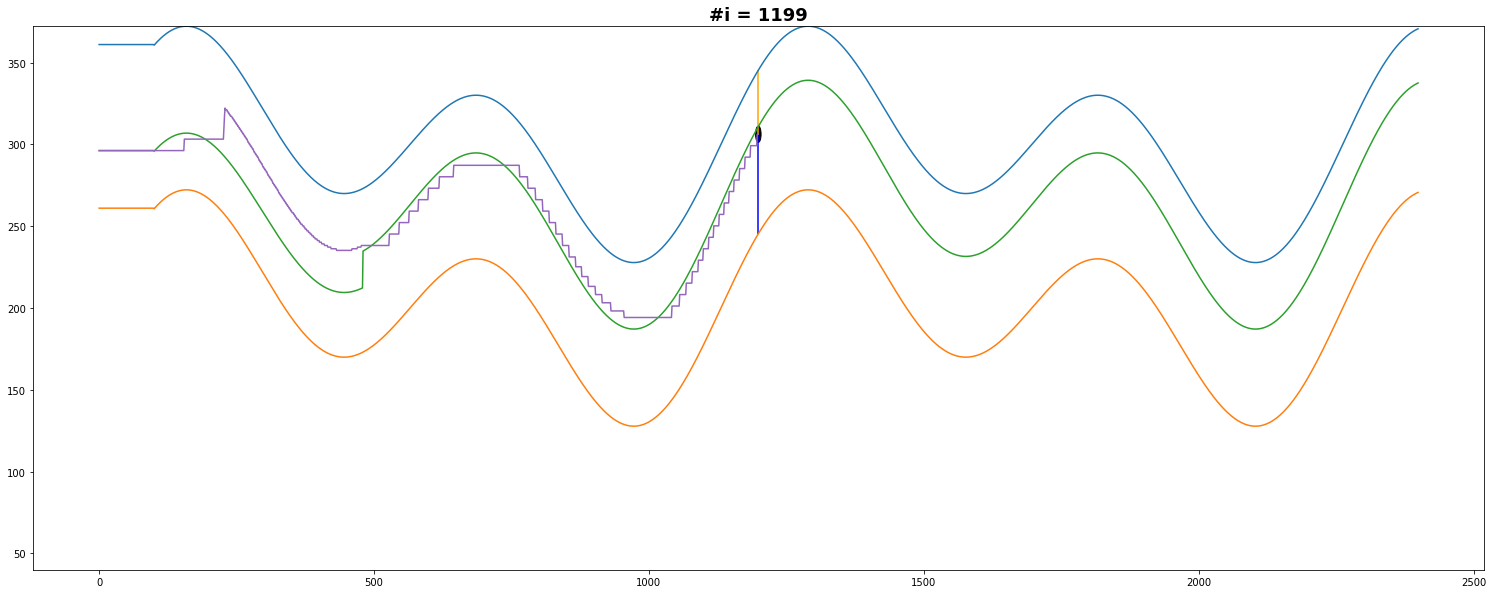

 --------------- plot --------------- 


In [144]:
testAuto.plot_history(1)

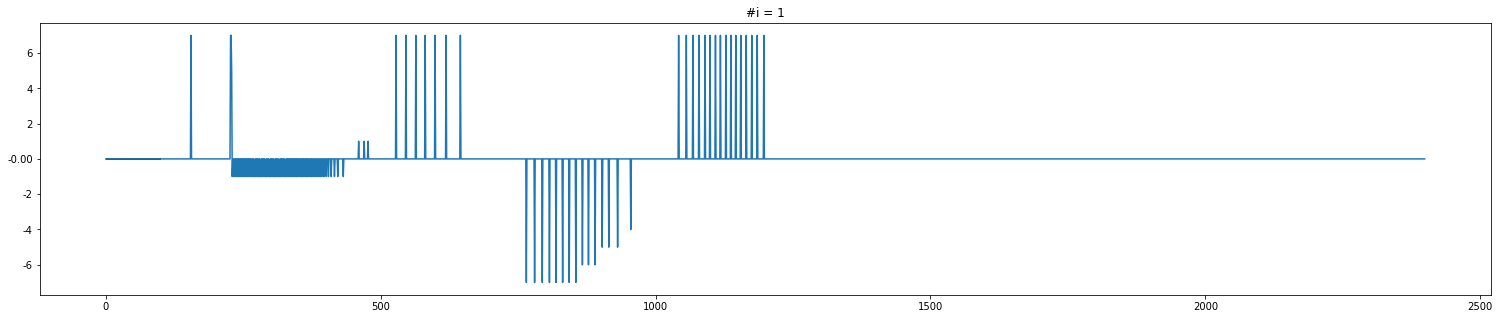

In [145]:
postPlotter = PostPlotter(testAuto)
postPlotter.plot_y_move_v2(car = testAuto, x = 1, flag = 1, height = 5)

Érdemes újra lefuttatni úg hogy a condition=1 és úgy hogy a condition=4 vagy a condition=5

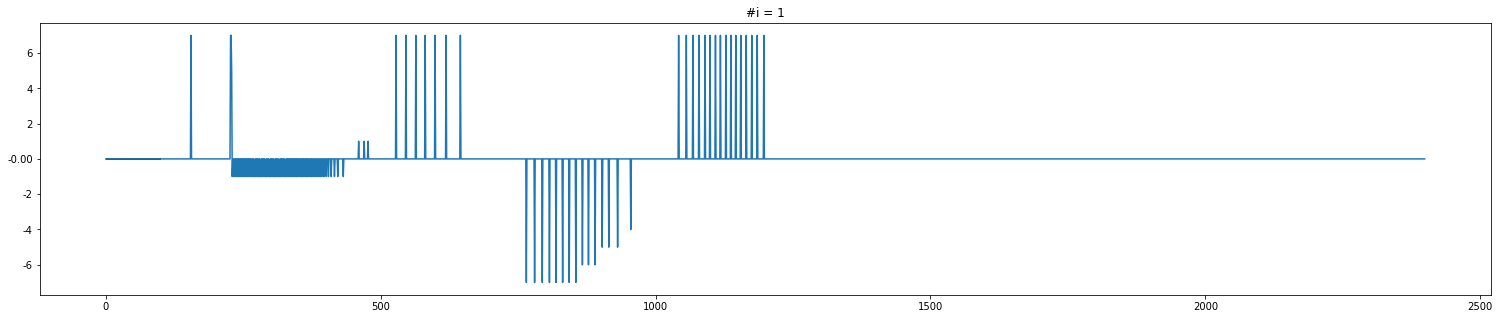

In [146]:
postPlotter = PostPlotter(testAuto)
postPlotter.plot_y_move_v2(car = testAuto, x = 1, flag = 1, height = 5)

# Data

In [147]:
# Egyéként ha majd azt akarom csinálni, hogy menet közben nem akarok kiprintelni semmit
# de a végén szeretnék néhány képet csinálni a meglévő függvényekkel.
# Akkor nem kell újra írnom őket, hanem a Car ojektumon átálitom a <<flag>>
# értékeket és meghívom az adott plot() függvényt valahogy így

# auto.plot_investigation_flag = 1          # 0 - disable, 1 - plot, 2 - save, 3 - both

# auto.plot_investigation_senors(_y_test_full, predicted_test_full, self.plot_investigation_flag)

# bár azért ezzel óvatósan, ki tudja mit tárolt el éppen az utolsó változó

# Zip *.png to images.zip

<a name="zip"></a> [set](#set) [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) [str](#str) zip [tst](#tst)


In [148]:
%%capture
! zip -0 images.zip *.png

# Csak a Google Colabon használom

# from google.colab import files

# files.download('images.zip')

# Save to MP4

A gif exportot kivettem, ha kell a régebiek között X23 megtalálható.<br>
Felváltottam az MP4 Exporttal.

[set](#set) [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [tst](#tst)

In [149]:
import os
import glob
import subprocess


def create_animated_mp4(filter = 'history*.png', prefix = 'ani_', framerate = 10):
  output = prefix + filter[0:filter.find('*')] + '.mp4'
  os.system("rm " + output + "  > /dev/null 2>&1")
  # os.system('rm' + output + '  > /dev/null 2>&1')
  # os.system("rm " + output)
  if( len(glob.glob(filter)) > 0 ):
    # os.system('ffmpeg -r ' + str(framerate) + ' -pattern_type glob -i "' + filter + '" -vcodec mpeg4 -y ' + output)
    os.system('ffmpeg -r ' + str(framerate) + ' -pattern_type glob -i "' + filter + '" -vcodec libx264 -crf 25 -pix_fmt yuv420p ' + output)

    print('ok')

    # rossz egyenként letöltögetni őket, ugyhogy inkább be zippelem és egyben letöltöm
    # files.download(output)
  else:
    # print('Nincsenek ilyen filok a szürési feltétel alapján -> ezért videót sem csináltunk')
    print('skipped')
    pass

In [150]:
create_animated_mp4('history*.png', 'ani_', framerate=10)

create_animated_mp4('y_move*.png', framerate=10)

create_animated_mp4('trace*.png', framerate=10)

create_animated_mp4('sensorCenterAfterScaled_vs_sensorCenterPredictedAfterScaled_S1*.png', framerate=10)
create_animated_mp4('sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v1*.png', framerate=10)
create_animated_mp4('sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v2*.png', framerate=10)
create_animated_mp4('sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v3*.png', framerate=10)
create_animated_mp4('sensorCenter_vs_yDistance_v1*.png', framerate=2)
create_animated_mp4('sensorLeftAfterScaled_vs_sensorLeftPredictedAfterScaled_S1*.png', framerate=10)
create_animated_mp4('sensorLeftBeforeScaled_vs_sensorLeftAfterScaled_v1*.png', framerate=10)
create_animated_mp4('sensorLeftBeforeScaled_vs_sensorLeftAfterScaled_v3*.png', framerate=10)
create_animated_mp4('sensorRightAfterScaled_vs_sensorRightPredictedAfterScaled_S1*.png', framerate=10)
create_animated_mp4('sensorRightBeforeScaled_vs_sensorRightAfterScaled_v1*.png', framerate=10)
create_animated_mp4('sensorRightBeforeScaled_vs_sensorRightAfterScaled_v2*.png', framerate=10)
create_animated_mp4('sensorRightBeforeScaled_vs_sensorRightAfterScaled_v3*.png', framerate=10)

create_animated_mp4('sensorRight_vs_yDistance_v1*.png', framerate=2)
create_animated_mp4('state_space_discover_LeftRightCenter_3D*.png', framerate=10)
create_animated_mp4('state_space_discover_LeftRightYDistance_3D*.png', framerate=10)
create_animated_mp4('state_space_discover_LeftRightYDistance_2D*.png', framerate=10)
create_animated_mp4('state_space_discover_LeftRightYDistance_WhitoutBorder*.png', framerate=10)

create_animated_mp4('yDistance_vs_yDistance_predicted_type0*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_type1*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_type2*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_type3*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_type4*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_type5*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_typeWrong*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_typeCorrect_bw*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_typeCorrect_col*.png', framerate=2)


create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v1*.png', framerate=10)
create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v2*.png', framerate=10)
create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v3*.png', framerate=10)
create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v4*.png', framerate=10)
create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v5*.png', framerate=10)


create_animated_mp4('timeline_sensors_v1*.png', framerate=10)

create_animated_mp4('ANN_*.png', framerate=10)

create_animated_mp4('Plot3D*.png', framerate=10)

create_animated_mp4('PostPlotter_3D_MLP_Prediction*.png', framerate=10)


skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

ok
skipped
skipped


frame=   18 fps=0.0 q=-1.0 Lsize=     188kB time=00:00:01.50 bitrate=1025.4kbits/s speed=7.28x    
video:187kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.553841%
[libx264 @ 0x5573cb0143c0] frame I:1     Avg QP:24.00  size: 40198
[libx264 @ 0x5573cb0143c0] frame P:5     Avg QP:23.83  size: 19593
[libx264 @ 0x5573cb0143c0] frame B:12    Avg QP:22.13  size:  4363
[libx264 @ 0x5573cb0143c0] consecutive B-frames:  5.6% 11.1% 16.7% 66.7%
[libx264 @ 0x5573cb0143c0] mb I  I16..4:  9.3% 57.6% 33.0%
[libx264 @ 0x5573cb0143c0] mb P  I16..4:  0.4%  1.0%  8.7%  P16..4:  4.2%  3.3%  4.6%  0.0%  0.0%    skip:77.8%
[libx264 @ 0x5573cb0143c0] mb B  I16..4:  0.2%  0.3%  1.2%  B16..8:  4.6%  1.3%  1.9%  direct: 1.2%  skip:89.2%  L0:37.6% L1:53.1% BI: 9.4%
[libx264 @ 0x5573cb0143c0] 8x8 transform intra:38.8% inter:20.8%
[libx264 @ 0x5573cb0143c0] coded y,uvDC,uvAC intra: 47.9% 50.4% 48.7% inter: 4.8% 5.9% 4.7%
[libx264 @ 0x5573cb0143c0] i16 v,h,dc,p: 83%  7%  9%  0%
[li

In [151]:
%%capture
! zip -0 ani.zip *.mp4

# Csak a Google Colabon használom

# files.download('ani.zip')

# !rm *.png *.mp4

# !unzip images.zip

# Test Auto

<a name="tst"></a> [set](#set) [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) tst

In [152]:
# Save

# Via storage object -> passing a car object
storage.save_mlp_from_object(auto)
storage.save_regression_from_object(auto)
storage.save_minmaxscaler_from_object(auto)

# Via auto.storage object -> passing a car object and its property fields
#  -> this can be used inside the car.run() methos as well
auto.storage.save_mlp(auto.mlp)
auto.storage.save_minmaxscaler(auto.x_minmaxscaler, auto.y_minmaxscaler)
auto.storage.save_regression(auto.regression_left, auto.regression_center, auto.regression_right)

# Both, the storage and the auto.storage has the same refrence, so it works back and forth

# ----------------------------------------------------------------------------------------

# Load

# Via storage object -> these are void methods but updates its own self.property fields which later can be called such 'storage.mlp', 'storage.regression_left'
storage.load_mlp()
storage.load_regression()
storage.load_minmaxscaler()


# Via car object -> these are the same as above (as storage is a property of the car object) -> works as a static void or a vodi setter
auto.storage.load_mlp()
auto.storage.load_regression()
auto.storage.load_minmaxscaler()
# Both, the storage and the auto.storage has the same refrence, so it works back and forth


# Ez viszont csak az auto objektumon kereszül érhető el és nem perzistens, gyakorlatilag ezt mentjük el és ezt váltjuk ki a betöltéssel, ha van mit betölteni
auto.mlp

# Ha el lett menteve akármelyik módszerrel
storage.save_mlp_from_object(auto)
auto.storage.save_mlp(auto.mlp)
# Akkor utána elérhető akár az auto.storage objektumon keresztül
auto.storage.mlp
# Akár a storage objektumon keresztül, mert minkettőnek ugyan az a referenciája
storage.mlp

# lényegében ha a storage load megtörtént akkor ezt kell használnom a tesztautóban
# a tesztautó példányosításnál kapja meg a storage-ot és az __init__-ben híja
# meg a load_all metodust

# tanuló car (auto) pedig a futás végén hívja meg a storage save_all metodust
# ezzel gyakorlatilag kiírja minden modelt amit majd a teszt autó be tud olvasni




MLPRegressor(activation='tanh', early_stopping=True, hidden_layer_sizes=(10, 5),
             learning_rate_init=0.01, max_iter=1, n_iter_no_change=2000,
             random_state=1, shuffle=False, verbose=True, warm_start=True)

In [153]:
# Igazából azt hiszem az utat sem kell újra megcsinálnunk, de ha később új utat szeretnénk neki adni azt itt tehetjük meg
# road = Road(wide = 100, length = 3000)


testRoad = road

# A plotter objektumot sem kell újra példányosítanunk, helyette a régi plottert kapja meg
# plotter = Plotter()
# Nem csinálunk új storage objektumot, helyette a feltanítottat kapja meg
# storage = Storage()
testAuto = TestCar(testRoad, plotter, storage, printer)

testAuto.calculate_distances()
testAuto.plot_history(1)

testAuto.sensor_center_enable = False

testAuto.printer._ta = True
testAuto.printer._ut = False

testAuto.run(900, cond=5)

---------- Finish Run ----------


## Itt hasonlítom össze a testAuto futási eredményeit

By the way -> kis zavar lehet az erőben, hogy mikor melyik objektumon melyik metodust használom.

1. Car objektumnak vannak bizonyos plot funkcói.<br>
Főként azokat tettem ide amelyekből animációt akarok csinálni, vagy futás közben is akarom látni a kimenetüket.

2. Car objektum példányosításnál kap egy Plotter objektumot.<br>
Ennek az volt az elsődleges célja, hogy kivezessem a Car osztályból a Plot funkciókat.<br>
A Plotter osztály olyan faramucin lett megírva, hogy a metodusai és azok szignaturája elég változatos és specifikus. Tulajdonképpen itt is arról van szó, hogyha valamit menet közben és többször is ki akarok plottoltani, akkor annak a Car objektumban kell lennie.

3. PostPlotter osztály viszont egy Car objektumot kap és minden metodusa úgy van megírva, hogy a Car objektumból olvassa ki az adatokat. Ezzel a módszerrel a futás utáni eredményeket akartam megjeleníteni. 

> **Lényegében:** A Car vagy TestCar osztályba marha kényelmes plot fügvényeket tenni, csak nem célszerű. Mert fejlesztésnél akár hányszor átirom őket újra kell példányosítanom magát az objektumot és azzal együtt elveszik minden benne tárolt adat - Sajnos ez akkor sem lesz jobb ha kiszervezem ezeket a Plotter osztályba mert azt is Car és a TestCar osztály kapja meg. Erre van a PostPlotter osztály ami egy Car objektumot vár. Ha már jó és beállítottam mindent egy adott plot metoduson utána átrakhatom a Plotter osztályba, fejlesztés alatt viszont a PostPlotter osztályban van.

Végeredményben elég lenne a Plotter osztály és a másik ket megoldást (PostPlotter és hogy a Car objektumank vannak plot metodusai) ki kellene vezetni.

self.distance_right_from_wall =  -68.75459444030207
self.distance_left_from_wall  =  -31.24540555969793


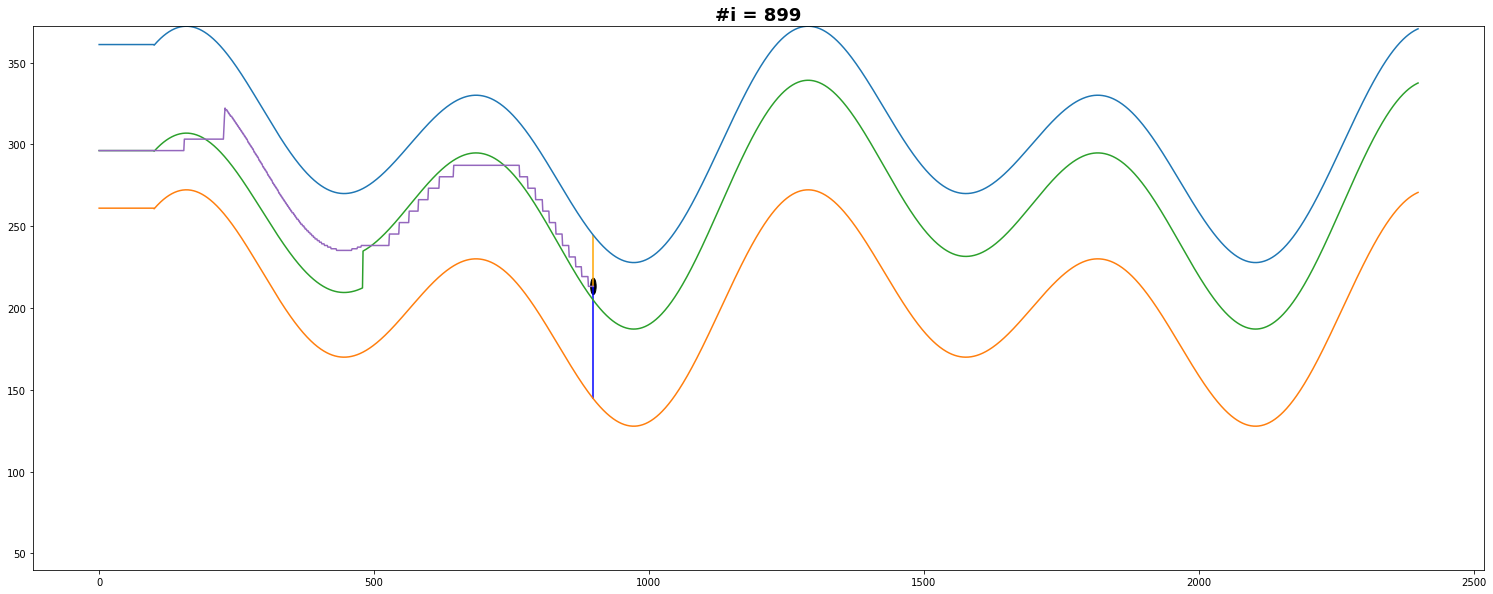

 --------------- plot --------------- 


In [154]:
# Nem post plotter, hanem az auto.plot_history(flag = 1)
testAuto.plot_history(1)

self.distance_right_from_wall =  -68.75459444030207
self.distance_left_from_wall  =  -31.24540555969793


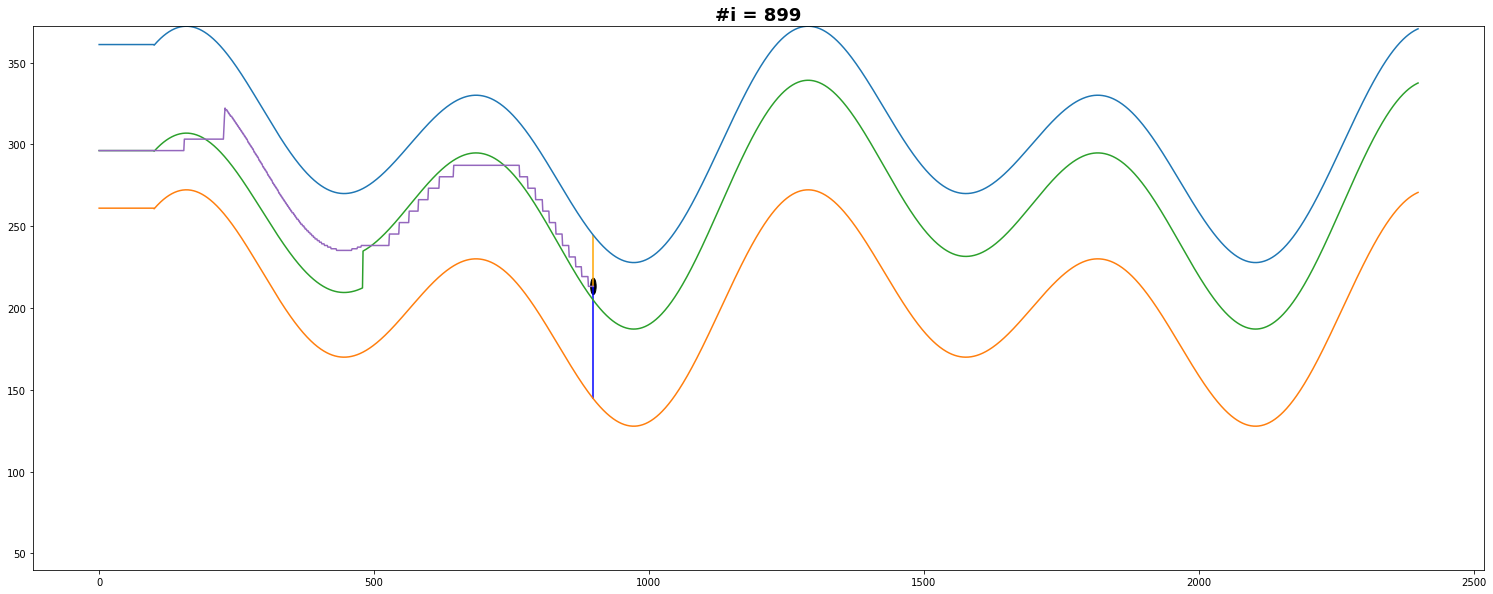

 --------------- plot --------------- 


In [122]:
# Nem post plotter, hanem az auto.plot_history(flag = 1)
testAuto.plot_history(1)

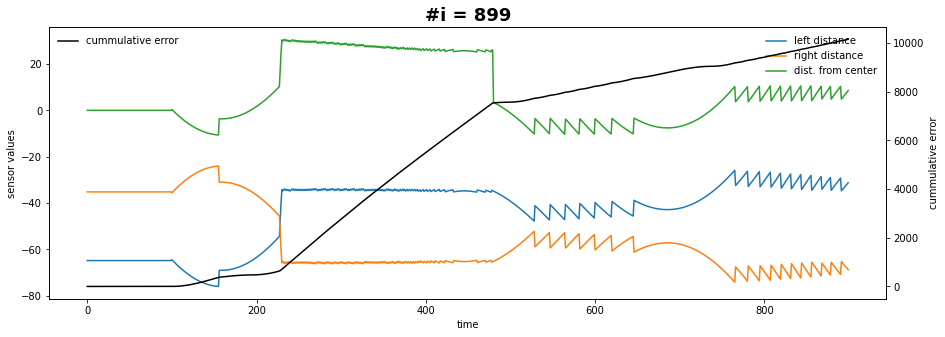

In [123]:
testAuto.plotter.test_plot2(testAuto.sensor_left, testAuto.sensor_right, testAuto.y_distance, testAuto.x, 1, [99])

In [124]:
# cummulativ error utolsó értéke

print(
    np.cumsum(np.abs(testAuto.y_distance))[-1]
)


# max legnagyobb lépés a futás során

tmp = np.diff(np.array(testAuto.y_history), 1, -1, prepend=0)
tmp[0] = 0
max_action_value = np.array(tmp).max()
print(
    max_action_value
)

10153.124079803889
7.0


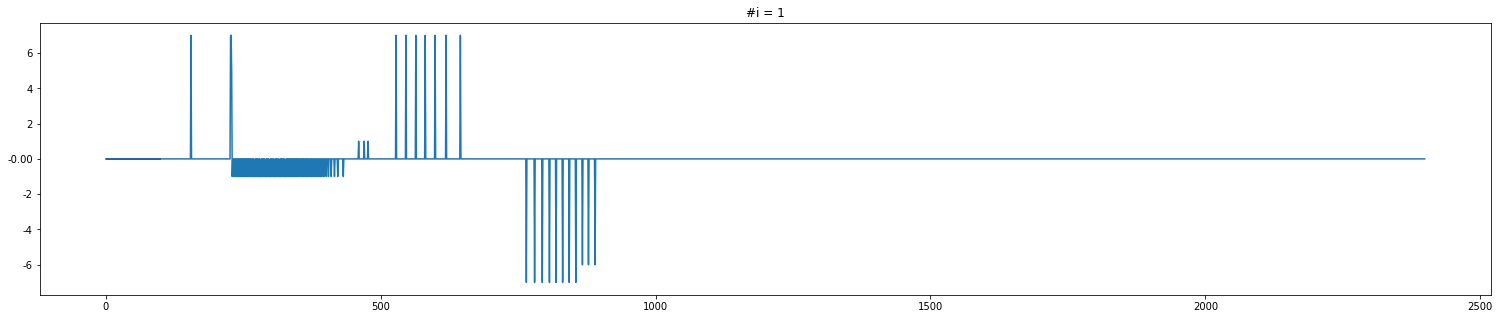

In [125]:
postPlotter = PostPlotter(testAuto)
postPlotter.plot_y_move_v2(car = testAuto, x = 1, flag = 1, height = 5)

# Legacy
# testAuto.plotter.plot_y_move(testAuto.y_history, testAuto.x, 1)

In [126]:
%%capture
! rm images.zip
! zip -0 images.zip *.png

# Csak a Google Colabon használom
# files.download('images.zip')

create_animated_mp4('test_history*.png', 'ani_', framerate=10)

%%capture
! zip -0 ani.zip *.mp4

# Csak a Google Colabon használom
# files.download('ani.zip')

<a name="irodalom"></a>

# Felhasznált irodalom és internetes cimek

Itt gyűjtöttem össze a menet közben összegyűjt okosságokat

[vissza a tartalomhoz](#tartalom)<br>

Scikit-learn - MLPRegressor API
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html


Fogalmak és probléma meghatározás
<br>
https://www.rubrik.com/blog/architecture/20/12/customized-autoscaling--minimize-your-cloud-cost


https://github.com/kubernetes/autoscaler/blob/master/cluster-autoscaler/FAQ.md#what-are-the-parameters-to-ca

https://arxiv.org/pdf/1608.04030.pdf

Metrikák amivel a szollgáltatás minőségét mérik különböző esetekben
<br>
https://blog.avinetworks.com/autoscaling-metrics

------------

NumPy API Reference Guide
<br>
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html


Seaborn API Reference Guide
<br>
https://seaborn.pydata.org/examples/pair_grid_with_kde.html


Python Logger API Reference Guide
<br>
https://docs.python.org/3/howto/logging-cookbook.html#logging-cookbook


Python Logger API Tutorial
<br>
https://coralogix.com/blog/python-logging-best-practices-tips


PyPlot Colorbar Tutorial
<br>
https://matplotlib.org/stable/tutorials/colors/colorbar_only.html


PyPlot Subplot Tutorial
<br>
https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html


Scikit Learn ONYX Save model
<br>
http://onnx.ai/sklearn-onnx


Scikit Learn Save Model
<br>
https://stackabuse.com/scikit-learn-save-and-restore-models

------------

Scikit learn API Warm_start and Partial_fit
<br>
https://newbedev.com/what-is-the-difference-between-partial-fit-and-warm-start


Online learning
<br>
https://www.dummies.com/programming/big-data/data-science/tips-for-dealing-with-big-data-in-python/


Online learning
<br>
https://dziganto.github.io/data%20science/online%20learning/python/scikit-learn/An-Introduction-To-Online-Machine-Learning/


------------

Huber Loss
<br>
https://en.wikipedia.org/wiki/Huber_loss


Gradient Descent - van benne egy tök jó animáció - emlékszem amikor az első ilyet írtam 10 éve
<br>
https://en.wikipedia.org/wiki/Gradient_descent


Online Learning
<br>
https://en.wikipedia.org/wiki/Online_machine_learning


Ezen tök jól lehet demonstrálni, hogy miért tanul gyorsan a 'relu', gyorsabban a 'tanh' és lassan a 'logistic' azonos beállítások mellett, habár végül midhárom közel azonos eredményre vezet
<br>
https://playground.tensorflow.org

-------------------

Wow
<br>
https://matplotlib.org/devdocs/gallery/mplot3d/voxels_numpy_logo.html

Wow - Nice Pyplot Graphics
<br>
<a href="https://www.google.com/imgres?imgurl=https%3A%2F%2Fi.stack.imgur.com%2F0FSLf.png&imgrefurl=https%3A%2F%2Fstackoverflow.com%2Fquestions%2F48672663%2Fmatplotlib-render-all-internal-voxels-with-alpha&tbnid=ug0Bk5AvbBFGoM&vet=12ahUKEwiF_vrC0d7zAhUfiv0HHZkkCD4QxiAoA3oECAAQIw..i&docid=lv23pEYcw_qlvM&w=465&h=367&itg=1&q=pyplot%203d%20plot%20wall&ved=2ahUKEwiF_vrC0d7zAhUfiv0HHZkkCD4QxiAoA3oECAAQIw">Google search</a>

Wow - Nice Pyplot Graphics
<br>
<a href="https://www.google.com/imgres?imgurl=https%3A%2F%2Fi.stack.imgur.com%2FvLogW.png&imgrefurl=https%3A%2F%2Fstackoverflow.com%2Fquestions%2F48672663%2Fmatplotlib-render-all-internal-voxels-with-alpha&tbnid=jmhk8RQrADn_iM&vet=12ahUKEwivwqC44d7zAhUH8LsIHWVICYkQxiAoAHoECAAQEQ..i&docid=lv23pEYcw_qlvM&w=428&h=352&itg=1&q=pyplot%203d%20plot%20wall&ved=2ahUKEwivwqC44d7zAhUH8LsIHWVICYkQxiAoAHoECAAQEQ">Google search</a>

Wow - Nice Pyplot Graphics
<br>
<a href="https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.researchgate.net%2Fprofile%2FAndrew-Thompson-21%2Fpublication%2F256099533%2Ffigure%2Ffig2%2FAS%3A601596220153863%401520443124187%2FThree-possible-2D-views-of-a-3D-surface-representing-the-response-to-two-drugs-A.png&imgrefurl=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FThree-possible-2D-views-of-a-3D-surface-representing-the-response-to-two-drugs-A_fig2_256099533&tbnid=PCWbaGIBwOUEqM&vet=12ahUKEwjU5bet0d7zAhUZ8rsIHQuQDVAQxiAoBXoECAAQGQ..i&docid=sbOccjnKSDRdPM&w=850&h=1014&itg=1&q=pyplot%203d%20plot%20wall&ved=2ahUKEwjU5bet0d7zAhUZ8rsIHQuQDVAQxiAoBXoECAAQGQ">Google search</a>

-----------

PyPlot - Memory issue and its solution
<br>
https://www.py4u.net/discuss/208758

```
JoDeMiro - What else^^^˘˘°°˛˛˛
```